# Intro

## Description
This data contains the sales and playtime of 1000+ video games released between 2004 and 2010.

https://corgis-edu.github.io/corgis/python/video_games/

## Motivation
I have always been interested in video games and I would like to investigate whether there is a correlation between various playtime metrics (avg, min lengths to beat, etc.) and sales numbers for those video games.


# Data Exploration


In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

def get_dataset_df(dataset_name):
    dataset_name = dataset_name.lower()
    dataset_name = dataset_name.replace(" ", "_")
    site_name = f"https://corgis-edu.github.io/corgis/csv/{dataset_name}"

    response = requests.get(site_name)
    soup = BeautifulSoup(response.content, "html.parser")

    csv_link = [link["href"] for link in soup.find_all("a") if link.has_attr('download')][0]
    csv_link = csv_link[6:]
    csv_link = f"https://corgis-edu.github.io/corgis/{csv_link}"

    df = pd.read_csv(csv_link)

    return df

In [2]:
df = get_dataset_df("Video Games")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1212 entries, 0 to 1211
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Title                          1212 non-null   object 
 1   Features.Handheld?             1212 non-null   bool   
 2   Features.Max Players           1212 non-null   int64  
 3   Features.Multiplatform?        1212 non-null   bool   
 4   Features.Online?               1212 non-null   bool   
 5   Metadata.Genres                1212 non-null   object 
 6   Metadata.Licensed?             1212 non-null   bool   
 7   Metadata.Publishers            948 non-null    object 
 8   Metadata.Sequel?               1212 non-null   bool   
 9   Metrics.Review Score           1212 non-null   int64  
 10  Metrics.Sales                  1212 non-null   float64
 11  Metrics.Used Price             1212 non-null   float64
 12  Release.Console                1212 non-null   o

In [3]:
df.describe()

,Features.Max Players,Metrics.Review Score,Metrics.Sales,Metrics.Used Price,Release.Year,Length.All PlayStyles.Average,Length.All PlayStyles.Leisure,Length.All PlayStyles.Median,Length.All PlayStyles.Polled,Length.All PlayStyles.Rushed,...,Length.Main + Extras.Average,Length.Main + Extras.Leisure,Length.Main + Extras.Median,Length.Main + Extras.Polled,Length.Main + Extras.Rushed,Length.Main Story.Average,Length.Main Story.Leisure,Length.Main Story.Median,Length.Main Story.Polled,Length.Main Story.Rushed
count,1212.000000,1212.000000,1212.00000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,...,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000
mean,1.658416,68.828383,0.50316,17.393894,2006.820132,13.653177,26.250426,11.225371,44.415842,9.396163,...,12.731491,18.866048,12.103548,13.995875,10.319788,8.465952,11.051966,8.280941,24.882838,6.974697
std,1.204377,12.956266,1.06985,5.018972,1.050653,19.397156,51.598941,13.493717,154.837893,11.176371,...,23.979610,42.917021,23.355374,57.333257,20.895117,9.691745,14.092617,9.502600,87.382770,7.964522
min,1.000000,19.000000,0.01000,4.950000,2004.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,60.000000,0.09000,14.950000,2006.000000,3.562500,4.000000,3.025000,1.000000,2.600000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,70.000000,0.21000,17.950000,2007.000000,8.858333,12.000000,8.000000,6.000000,6.708333,...,7.291667,8.000000,7.000000,1.000000,6.283333,6.575000,8.000000,6.041667,3.000000,5.341667
75%,2.000000,79.000000,0.46000,17.950000,2008.000000,16.033333,27.600000,13.783333,25.000000,11.366667,...,16.112500,21.033333,15.000000,7.000000,12.941667,11.033333,14.508333,10.533333,14.000000,9.312500
max,8.000000,98.000000,14.66000,49.950000,2008.000000,279.733333,476.266667,126.000000,2300.000000,120.200000,...,291.000000,478.933333,291.000000,1100.000000,291.000000,72.383333,135.583333,70.000000,1100.000000,70.000000


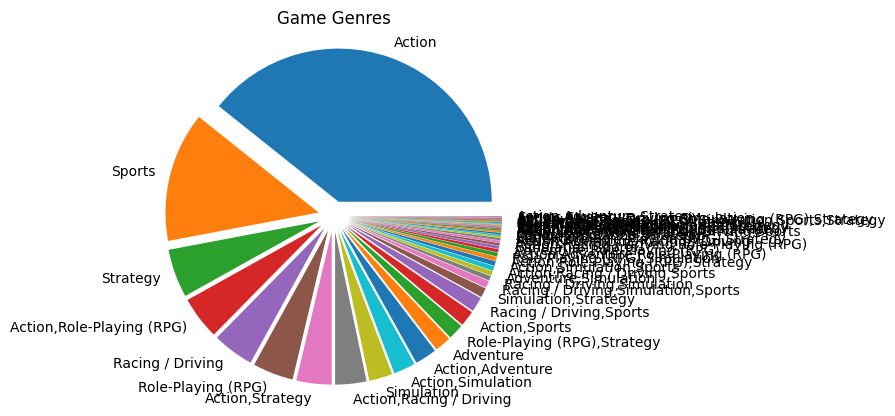

In [4]:
genre_count = df['Metadata.Genres'].value_counts()
plt.pie(genre_count, labels=genre_count.index, explode=[0.1]*len(genre_count))
plt.title('Game Genres')
plt.axis('equal')
plt.show()


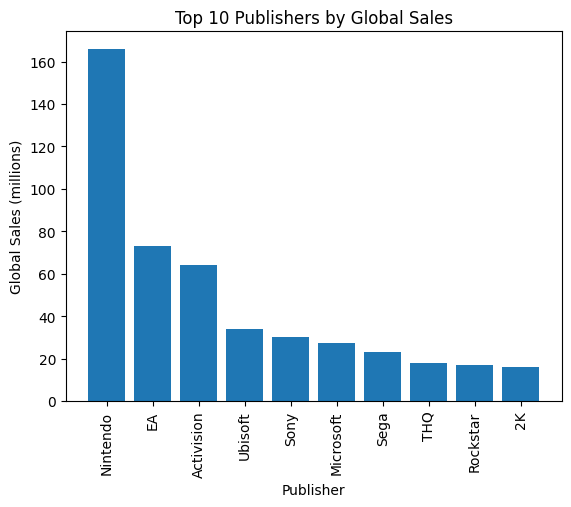

In [5]:
# Group the data by publisher and sum the global sales
publisher_sales = df.groupby('Metadata.Publishers')['Metrics.Sales'].sum().sort_values(ascending=False)
top_publishers = publisher_sales[:10]
plt.bar(top_publishers.index, top_publishers)
plt.xticks(rotation=90)
plt.title('Top 10 Publishers by Global Sales')
plt.xlabel('Publisher')
plt.ylabel('Global Sales (millions)')
plt.show()


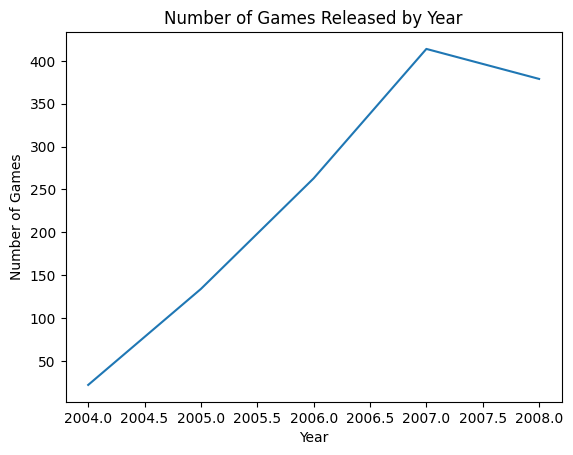

In [6]:
year_count = df.groupby('Release.Year')['Title'].count()
plt.plot(year_count.index, year_count)
plt.title('Number of Games Released by Year')
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.show()


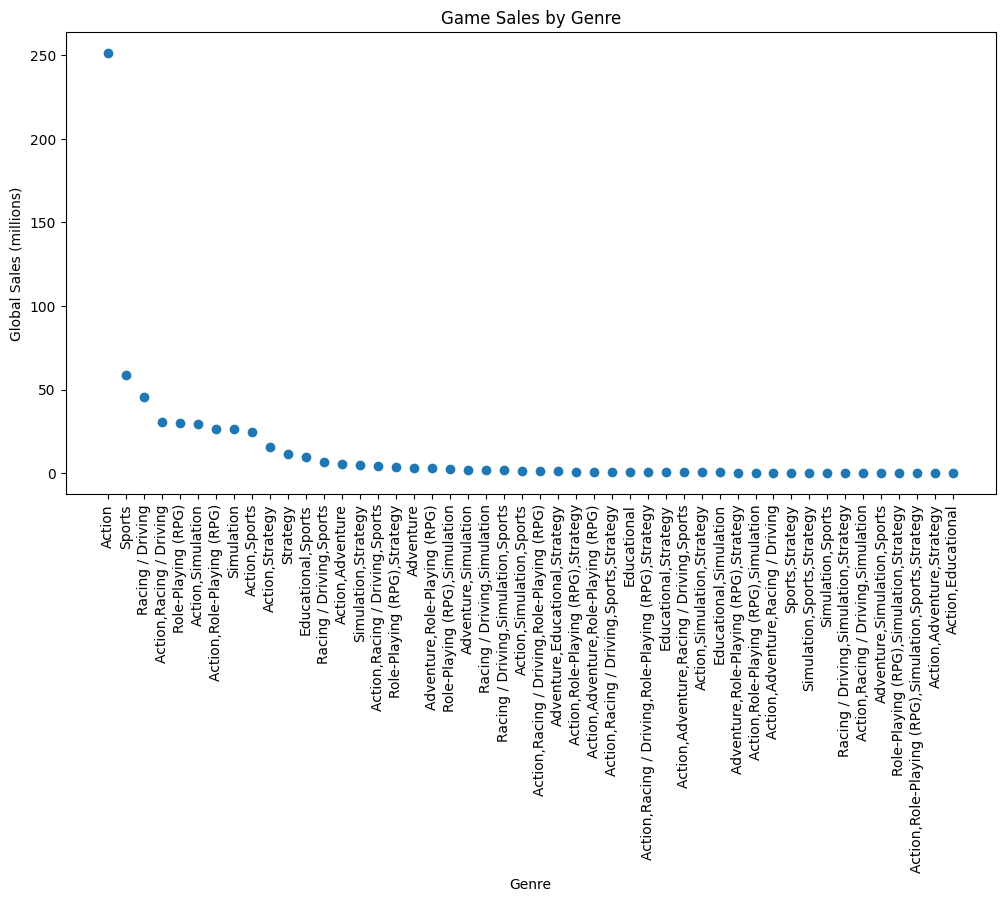

In [7]:
# Group the data by genre and sum the sales
genre_sales = df.groupby('Metadata.Genres')['Metrics.Sales'].sum().sort_values(ascending=False)

# Create a scatter plot of game sales by genre
plt.figure(figsize=(12,6))
plt.scatter(genre_sales.index, genre_sales)
plt.xticks(rotation=90)
plt.title('Game Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Global Sales (millions)')
plt.show()


# Analysis


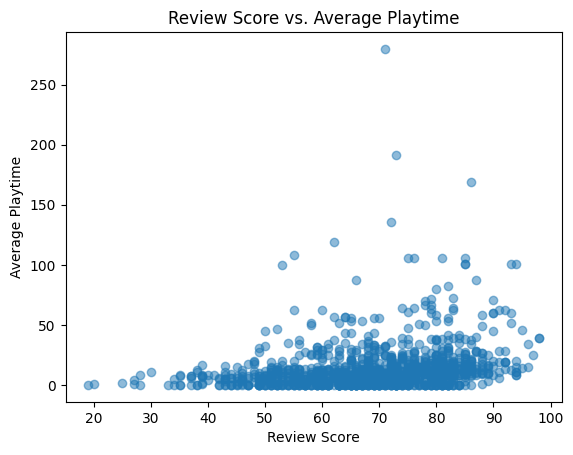

In [8]:
plt.scatter(df['Metrics.Review Score'], df['Length.All PlayStyles.Average'], alpha=0.5)
plt.title('Review Score vs. Average Playtime')
plt.xlabel('Review Score')
plt.ylabel('Average Playtime')
plt.show()

From the chart above, we can see that there is slight correlation between critic review score and average time to complete the game.

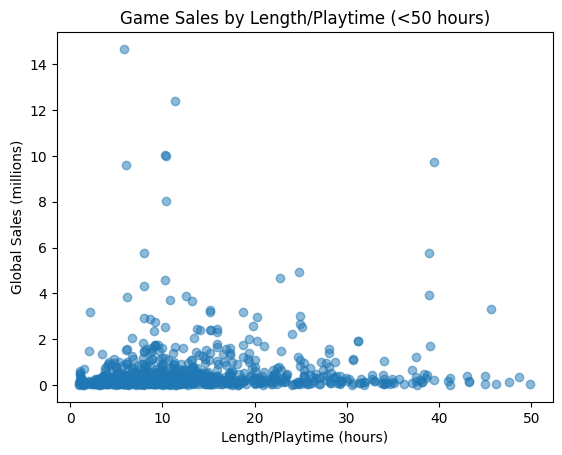

In [9]:
filtered_df = df[(df['Length.All PlayStyles.Average'] >= 1) & (df['Length.All PlayStyles.Average'] <= 50)]

plt.scatter(filtered_df['Length.All PlayStyles.Average'], filtered_df['Metrics.Sales'], alpha=0.5)
plt.title('Game Sales by Length/Playtime (<50 hours)')
plt.xlabel('Length/Playtime (hours)')
plt.ylabel('Global Sales (millions)')
plt.show()

This chart shows that there is no strong correlation between game sales and average playtime. This may indicate that simply having a longer game does not equate to a stronger game (quantity not necessarily better than quality).

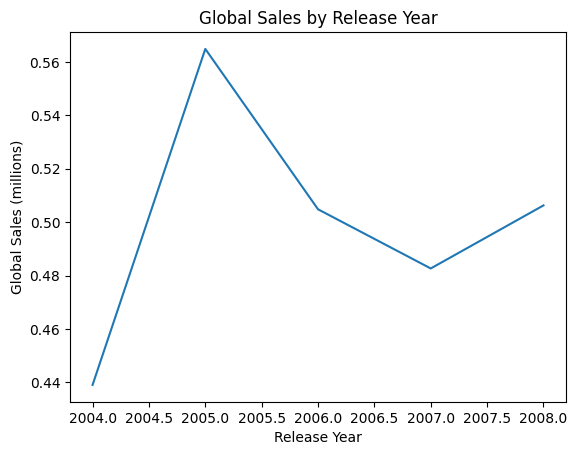

In [10]:
# Group the data by release year and sum the sales
year_sales = df.groupby('Release.Year')['Metrics.Sales'].mean()

# Create a line plot of global sales by release year
plt.plot(year_sales.index, year_sales)
plt.title('Global Sales by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Global Sales (millions)')
plt.show()


While the chart may indicate a large dip in sales around 2007, by examining the y-axis we can see that there has not been a huge shift in sales numbers over the years.

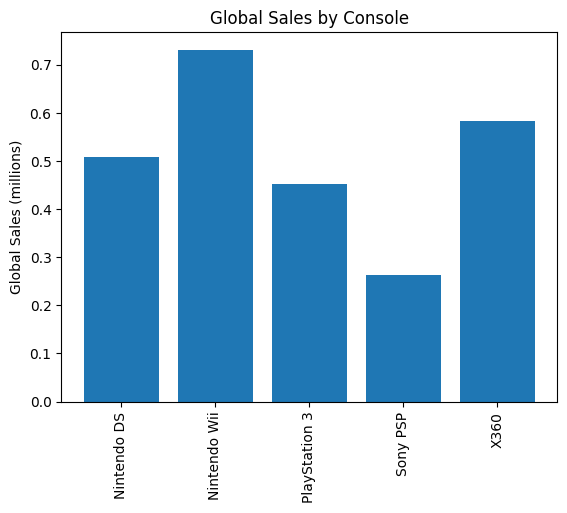

In [11]:
sales_by_console = df.groupby('Release.Console')['Metrics.Sales'].mean()

# Create a bar chart of global sales by console
plt.bar(sales_by_console.index, sales_by_console)
plt.xticks(rotation=90)
plt.ylabel('Global Sales (millions)')
plt.title('Global Sales by Console')
plt.show()

This chart shows, using the mean sales on each console platform, that to some extent, the console that the game runs on contributes to how many sales that game gets. This chart makes sense since the Nintendo Wii was extremely popular and thus games on it tended to sell more copies because more people had access to the hardware.